<font color="lightseagreen" size=8><b>Notation polonaise inversée</b></font>

<font color="lightseagreen" size=8><b>La notation polonaise</b></font>

> source : wikipédia

---

---

<p>L'expression qui ajoute les nombres 1 et 2 s'écrit, en notation préfixée,  + 1 2. Dans les expressions préfixées, les <a href="/wiki/Op%C3%A9rateur_(symbole)" title="Opérateur (symbole)">opérateurs</a> précèdent toujours leurs <a href="/wiki/Op%C3%A9rande" title="Opérande">opérandes</a> qui peuvent être eux-mêmes des <a href="/wiki/Expression_(math%C3%A9matiques)" title="Expression (mathématiques)">expressions</a> non-triviales. Par exemple, l'expression qui serait écrite en notation infixée classique&#160;:
</p>
<dl><dd>(5 − 6) × 7</dd></dl>
<p>est écrite en notation préfixée&#160;:
</p>
<dl><dd>× (− 5 6) 7</dd></dl>
<p>On notera que comme on connait l'<a href="/wiki/Arit%C3%A9" title="Arité">arité</a> des opérateurs, les parenthèses sont inutiles et l'expression précédente peut être simplifiée en&#160;:
</p>
<dl><dd>× − 5 6 7</dd></dl>
<p>L'évaluation du produit × est activée quand ses deux opérandes ont été évaluées (à savoir, 5 − 6 et 7). Plus généralement l'évaluation d'un opérateur d'arité <i>n</i> est activée après que ses <i>n</i> opérandes ont été évaluées.
</p>

<p>pour évaluer cette expression on doit multipler (- 5 6) et 7</p>
<p>pour évaluer - 5 6 pn doit soustraire 6 de 5</p>

L'expression vaut donc $(5 - 6) \times 7 = -7$

---

---


<font color="lightseagreen" size=8><b>La notation polonaise inverse</b></font>

La notation polonaise inverse (NPI) (en anglais RPN pour Reverse Polish Notation), également connue sous le nom de notation post-fixée, permet d'écrire de façon non ambiguë les formules arithmétiques sans utiliser de parenthèses. Dérivée de la notation polonaise présentée en 1924 par le mathématicien polonais Jan Łukasiewicz, elle s’en différencie par l’ordre des termes, **les opérandes y étant présentés avant les opérateurs et non l’inverse**.

Par exemple, l’expression $ 3 \times (4 + 7)$ peut s'écrire en NPI sous la forme :

**4 7 + 3 $\times$**, ou encore sous la forme **3  4  7 +  $\times$**.

---

---

## Effectuer le calcul en utilisant une pile :

Schéma illustrant le déroulement du calcul de 4 7 + 3 $\times$ :

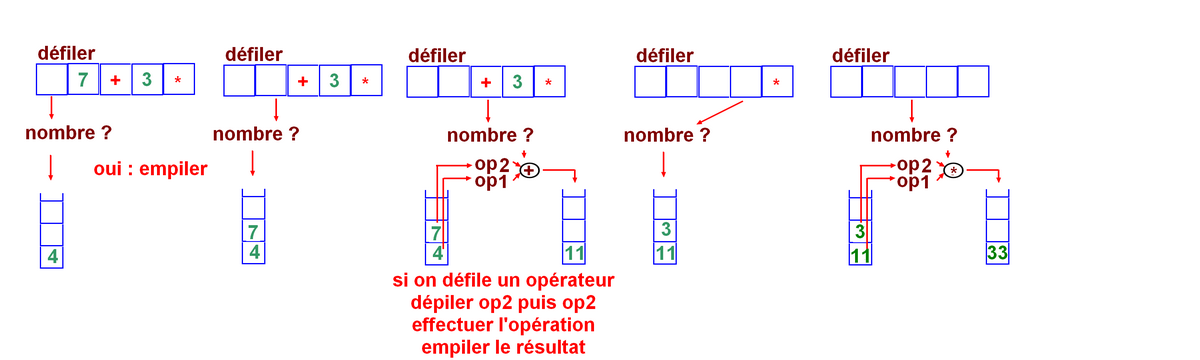

Schéma illustrant le déroulement du calcul de 3 4 7 + $\times$ :

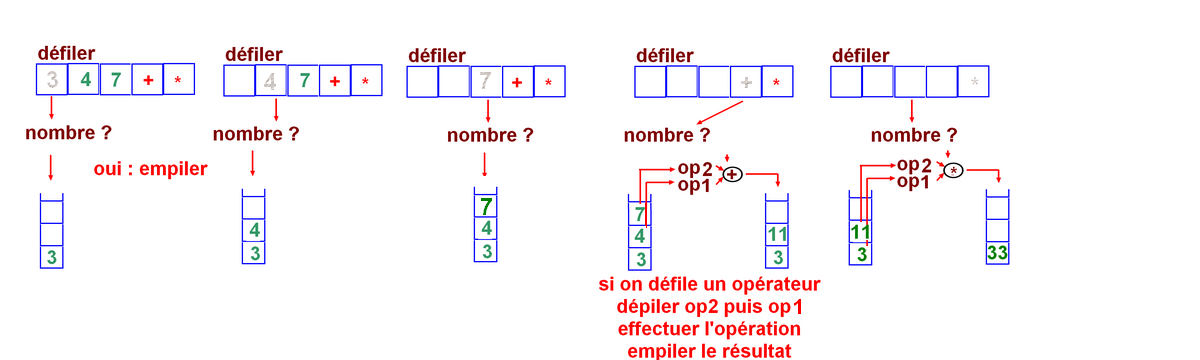

<font color=lightseagreen size=6><b>Stocker l'expression dans une file et l'évaluer avec une Pile</b></font>

Pour effectuer le calcul, chaque donnée numérique est enfilée, et lorsqu'on lit un opérateur, les opérandes sont dépilés (2 si l'opérateur est binaire), l'opération est effectuée et le résultat est mis au sommet de la pile.

Ainsi, par exemple, pour évaluer l'expression $2\ 3 + 4\ \times$ on la stocke dans une file : 

<center>( Sortie <- ) $2\ 3 + 4\ \times$ ( <- Entrée )</center>

+ On défile 2 qui est reconnu comme donnée numérique et de ce fait est empilé.
+ On défile 3 qui est également empilé.
+ qui est un opérateur binaire -> traitement : 2 et 3 sont dépilés, le calcul 2 + 3 est effectué, le résultat 5 est empilé.
+ on défile 4 qui est empilé.
+ on défile $\times$ , opérateur binaire -> traitement : 4 et 5 sont dépilés, le calcul $4 \times 5$ est effectué et le résultat $20$ est empilé.

la file est vide → le résultat final est au sommet de la pile.

<font color=lightseagreen size=6><b>Avant d'implémenter : Sur feuille</b></font>

Evaluez cette expression : $5\ 7 - 8\ \div$

Initialement:

+ file = [5, 7, '-', 8, '/'] et pile = []

Etape 1:
+ file = [7, '-', 8, '/'] 
+ pile = [5]

Etape 2:
+ file = ['-', 8, '/'] 
+ pile = [5, 7] (<- Dessus de la pile) 

Etape 3 :
+ file = [8, '/'] 
+ pile = [2] (<- Dessus de la pile) 

Etape 4 :
+ file = ['/'] 
+ pile = [2, 8] (<- Dessus de la pile) 

Etape 5 :
+ file = [] 
+ pile = [4] (<- Dessus de la pile) 

<font color="lightseagreen" size=8><b>1. Implémenter la File</b></font>


In [2]:
class File :
    def __init__(self) -> None:
        """ un seul attribut contenu initialisé à une liste vide """
        self.contenu = []

    def est_vide(self) -> bool:
        """ renvoie true si la File est vide, False sinon """
        return len(self.contenu) == 0
    
    def enfile(self,x) -> None:
        """ ajoute x a droite de la File, ne renvoie rien """
        self.contenu = self.contenu + [x]
    
    def defile(self) :
        """ retire un élément à gauche de la File, et renvoie sa valeur """
        return self.contenu.pop(0)

    def __str__(self) :
        """ pour afficher, ne rien modifier ici """
        return 'Sortie <- '+str(self.contenu)+' <- Entrée'


<font color="lightseagreen" size=8><b>2. Utiliser la File</b></font>

On souhaite crée la file contenant l'expression : **$4\ 3 + 5 \times$**

In [14]:
expression = [4,3,'+',5,'*']
# écrire les instructions permettant de créer la file :
objFile = File()
for i in expression:
    objFile.enfile(i)

# afficher la file
print(objFile)

# défiler une fois et affichez la valeur défilée, puis affichez la file de nouveau
defil = objFile.defile()
print(defil)
print(objFile)


Sortie <- [4, 3, '+', 5, '*'] <- Entrée
4
Sortie <- [3, '+', 5, '*'] <- Entrée


Si vous avez bien implémentez la file et vous avez bien effectuer les opération pour enfiler l'expression, puis  défiler le 4, vous devez obtenir ceci :
<pre>Sortie <- [4, 3, '+', 5, '*'] <- Entrée
4
Sortie <- [3, '+', 5, '*'] <- Entrée</pre>

<font color="lightseagreen" size=8><b>3. Implémenter la Pile</b></font>


In [3]:
class Pile :
    def __init__(self) -> None:
        """ un seul attribut contenu initialisé à une liste vide """
        self.contenu = []
        
    def est_vide(self) -> bool:
        """ renvoie true si la pile est vide, False sinon """
        return len(self.contenu) == 0
    
    def empile(self,x) ->None:
        """ ajoute x au sommet de la Pile, ne renvoie rien """
        self.contenu = self.contenu + [x]
    
    def depile(self) :
        """ retire le sommet de la Pile et renvoie sa valeur """
        return self.contenu.pop(len(self.contenu) - 1)
    
    def __str__(self) :
        """ pour afficher, ne rien modifier ici """
        return str(self.contenu)+' <- dessus'


<font color="lightseagreen" size=8><b>4. Utiliser la Pile</b></font>

+ créez une pile vide
+ empile 2
+ empiler 3
+ affecter '-' à une variable opérateur
+ depiler et affecter la valeur à une variable operande2
+ depiler et affecter la valeur à une variable operande1
+ faire afficher **2 - 3** en utilisant la variable *opérateur* et les 2 opérandes

Attention à l'ordre, $2-3 \neq 3-2$

In [18]:
objPile = Pile()
objPile.empile(2)
objPile.empile(3)

operateur = '-'
operande2 = objPile.depile()
operande1 = objPile.depile()

print(operande1, operateur, operande2)

2 - 3


<font color="lightseagreen" size=8><b>5. Fonction evaluer</b></font>

Cette fonction prend en entrée une File, et renvoie le résultat.

Les operateurs admis sont uniquement '+' et '-'.


> Vous aurez besoin d'identifier la nature des éléments défilés.
> pour savoir si c'est un nombre : 
```python
fonction évaluer :
   tant que f non vide :
      defiler f -> a
      Si le type de a est entier ou float :
         c'est un nombre ! -> empile
      Sinon : //c'est un opérateur
         dépiler -> op2
         dépiler -> op1
         effectuer l'opération et empiler le résultat
   fin tant que
   depiler p et renvoyer le résultat
```


In [28]:
def evaluer(f) :
    """
    :params f: une File non vide contenant une expression
    :returns : la valeur de l'expression 
    """
    pile = Pile()

    while not f.est_vide():
        a = f.defile()
        if type(a) is int or type(a) is float:
            pile.empile(a)
        else:
            op2 = pile.depile()
            op1 = pile.depile()

            res = 0

            if a == '+':
                res = op1 + op2
            else:
                res = op1 - op2

            pile.empile(res)

    res = pile.depile()
    return res


<font color="lightseagreen" size=8><b>6. Evaluer une expression</b></font>

+ créez une File contenant l'expression = [4, 3, '-', 5, '+']
+ utilisez la fonction evaluer() pour afficher le résultat


In [29]:
expression = [4,3,'-',5,'+']

# créez la file :
f = File()
for i in expression:
    f.enfile(i)

# affiche la file
print(f)

# calcule (affectez dans une variable nommée résultat), puis afficher
resultat = evaluer(f)
print('res :', resultat)

# teste le résultat
assert resultat == 6

Sortie <- [4, 3, '-', 5, '+'] <- Entrée
res : 6


<font color="lightseagreen" size=8><b>7. Modifier la fonction evaluer</b></font>

Cette fonction prend en entrée une File, et renvoie le résultat.

Nous souhaitons maintenant qu'elle prenne en paramètre une expression, donnée dans une liste python.

Ainsi on pourrait appeler :

```python
>>> evaluer( [4,3,'-',2,'+']) 
3
```




In [30]:
def evaluer(expression:list) :
    """
    :params expression: une liste contenant une expression
    :returns : la valeur de l'expression 
    """
    # recopiez puis modifiez la fonction
    f = File()

    for i in expression:
        f.enfile(i)

    pile = Pile()

    while not f.est_vide():
        a = f.defile()
        if type(a) is int or type(a) is float:
            pile.empile(a)
        else:
            op2 = pile.depile()
            op1 = pile.depile()

            res = 0

            if a == '+':
                res = op1 + op2
            else:
                res = op1 - op2

            pile.empile(res)

    res = pile.depile()
    return res


In [31]:
# test
evaluer([4, 3, '-', 2, '+'])

3

<font color="lightseagreen" size=8><b>8. Une fonction exec_operation</b></font>

Cette fonction prend en entrée 2 operandes et un operateur, et renvoie le résultat.

```python
>>> exec_operation( 4,3,'-') 
1
>>> exec_operation( 4,3,'+') 
7
```

Mais nous souhaitons plus tard ajouter d'autres opérateurs. La syntaxe :
```python
if operateur == '+' :
    ...
else :
    ...
```

n'est donc pas satisfaisante. Imaginez le code si on met un grand nombre d'opérateurs !

La moindre faute de frappe dans l'une des nombreuses lignes du code produira des erreurs, parfois délicates à diagnostiquer.

**Pour remédier à ce problème, nous allons créer un dictionnaire**

Les clés du dictionnaire sont les opérateurs : '+' et '*' pour le moment.
Les valeurs associées sont les expressions à effectuer.

par exemple, testez ce code :





In [ ]:
operande2 = 3
operande1 = 2
operations = {'+':operande1 + operande2}
print(operations['+'])

5




Cette fonction prend en entrée 2 operandes et un operateur, et renvoie le résultat.

Inspirez vous du code exemple ci-dessus.
Les opérateurs reconnus seront + - * et /.





In [5]:
def exec_operation(op1,op2,operateur) :
    operations = {
        '+' : op1 + op2,
        '-' : op1 - op2,
        '*' : op1 * op2,
        '/' : op1 / op2,
    }

    return operations[operateur]


# tests :
assert exec_operation(3,4,'*')==12
assert exec_operation(3,4,'-')==-1
assert exec_operation(3,4,'+')==7
assert exec_operation(3,4,'/')==0.75

<font color="lightseagreen" size=8><b>9. Modifier la fonction evaluer </b></font>

La partie traitement, quand on a défilé un opérateur, sera remplacée par l'appel de exec_operation()





In [6]:
def evaluer(expression:list) :
    """
    :params expression: une liste contenant une expression
    :returns : la valeur de l'expression 
    """
    # recopiez puis modifiez la fonction
    f = File()

    for i in expression:
        f.enfile(i)

    pile = Pile()

    while not f.est_vide():
        a = f.defile()
        if type(a) is int or type(a) is float:
            pile.empile(a)
        else:
            op2 = pile.depile()
            op1 = pile.depile()

            pile.empile(exec_operation(op1, op2, a))

    res = pile.depile()
    return res



# tests :
assert evaluer([3,4,'+'])==7
assert evaluer([3,4,'-',5,'*'])==-5
assert evaluer([-3,-4,'-',5,'/'])==0.2

<font color="lightseagreen" size=8><b>10. Ajouter des opérateurs</b></font>

Le dictionnaire dans exec_operation(), n'a que 4 clés : + - * et /

Ajoutez les opérateurs de comparaisons : **== != <= < > et >=**

Et les opérateurs de division euclidienne : **% et //**





In [7]:
def exec_operation(op1,op2,operateur) :
    # recopiez puis modifiez la fonction
    operations = {
        '+' : op1 + op2,
        '-' : op1 - op2,
        '*' : op1 * op2,
        '/' : op1 / op2,
        '==' : op1 == op2,
        '!=' : op1 != op2,
        '<=' : op1 <= op2,
        '>=' : op1 >= op2,
        '<' : op1 < op2,
        '>' : op1 > op2,
        '%' : op1 % op2,
        '//' : op1 // op2,
    }

    return operations[operateur]


# quelques tests :
print('3 != 4',exec_operation(3,4,'!='))
print('3 == 4',exec_operation(3,4,'=='))
print('3 > 4',exec_operation(3,4,'>'))
print('3 >= 4',exec_operation(3,4,'>='))
print('3 < 4',exec_operation(3,4,'<'))
print('3 <= 4',exec_operation(3,4,'<='))
print('13 % 4',exec_operation(13,4,'%'))
print('16 % 4',exec_operation(16,4,'%'))
print('3 // 4',exec_operation(3,4,'//'))

3 != 4 True
3 == 4 False
3 > 4 False
3 >= 4 False
3 < 4 True
3 <= 4 True
13 % 4 1
16 % 4 0
3 // 4 0


##**Utiliser nos nouveaux opérateurs**






In [8]:
expression = [4,3,'+',5,'*']
print('résultat :', [4,3,'+',5,'*'],"=",evaluer(expression))

expression = [4,3,'+',5,'*',10,'==']
print('résultat :', [4,3,'+',5,'*',10,'=='],"=",evaluer(expression))

expression = [4,3,'+',5,'*',10,'%']
print('résultat :', [4,3,'+',5,'*',10,'%'],"=",evaluer(expression))

expression = [4,3,'+',5,'*',10,'//']
print('résultat :', [4,3,'+',5,'*',10,'//'],"=",evaluer(expression))

résultat : [4, 3, '+', 5, '*'] = 35
résultat : [4, 3, '+', 5, '*', 10, '=='] = False
résultat : [4, 3, '+', 5, '*', 10, '%'] = 5
résultat : [4, 3, '+', 5, '*', 10, '//'] = 3


<font color="lightseagreen" size=8><b>11. Version récursive de la fonction evaluer </b></font>

On a modifié un peu le code pour séparer la création de la File, et son évaluation. On crée alors une pile vide et on appelle evaluer_file qui va faire le calcul.

La version de evaluer_file est impérative. Tansformez la en fonction récursive.





In [10]:
def evaluer(expression:list) :
    """
    :params expression: une liste contenant une expression
    :returns : la valeur de l'expression 
    """
    f = File()
    for elem in expression :
        f.enfile(elem)
    return evaluer_file(f,Pile())

def evaluer_file(f,p):
    if f.est_vide():
        return p.depile()
    else:
        a = f.defile()
        if type(a) in [int,float] :
            p.empile(a)
        else :
            op2 = p.depile()
            op1 = p.depile()
            p.empile(exec_operation(op1,op2,a))
        
        return evaluer_file(f, p)

# tests :
print(evaluer([3,4,'+']))
print(evaluer([3,4,'-',5,'*']))
print(evaluer([-3,-4,'-',5,'/']))

7
-5
0.2
